In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as pl

image_path = "./images/"
%matplotlib inline

## part a
### noise removal

(815, 1290)

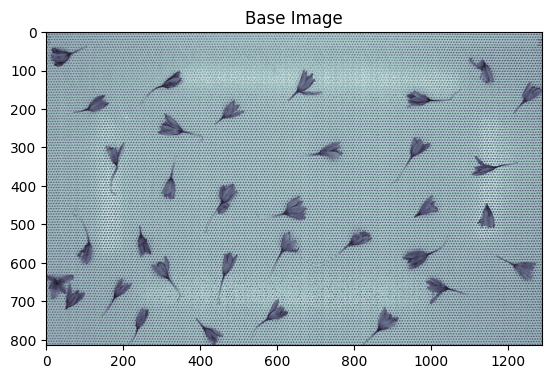

In [2]:
# read and show image
img1=cv2.imread('./images/img_01.jpg',0)
pl.figure()
pl.title("Base Image")
pl.imshow(img1,cmap='bone')
img1.shape

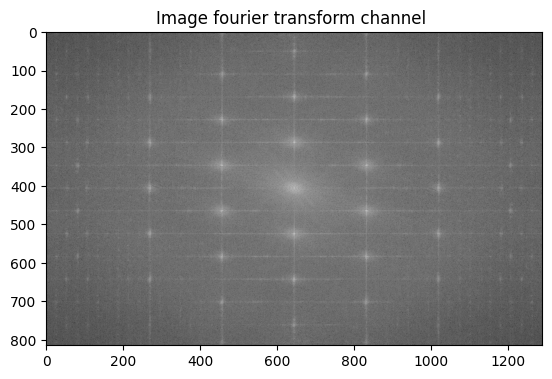

(815, 1290)

In [3]:
img1_ft = np.fft.fft2(img1)
abs_ft = np.abs(img1_ft)
shifted_ft=np.abs(np.fft.fftshift(img1_ft))

pl.figure()
pl.title(f"Image fourier transform channel ")
pl.imshow(np.log2(shifted_ft[:,:]),cmap='gray')
pl.show()
img1_ft.shape

In [4]:
img1_ft = np.fft.fft2(img1)

x_dist=58
y_dist=187
for i in [1,2]:
    img1_ft[x_dist*i:x_dist*i+3,:] *= 0.0001
    img1_ft[-x_dist*i-3:-x_dist*i,:] *= 0.0001
    img1_ft[:,y_dist*i:y_dist*i+3] *= 0.0001
    img1_ft[:,-y_dist*i-3:-y_dist*i] *= 0.0001

for i in [3, 4, 5,6]:
    
    img1_ft[x_dist*i:x_dist*i+4,:190] *= 0.00001
    img1_ft[x_dist*i:x_dist*i+4,-190:] *= 0.00001
    img1_ft[-x_dist*i-4:-x_dist*i,:190] *= 0.00001
    img1_ft[-x_dist*i-4:-x_dist*i,-190:] *= 0.00001

img1_ft[286:290,0:3] *= 0.0001
img1_ft[-290:-285,0:3] *= 0.0001
# np.average(abs_ft)

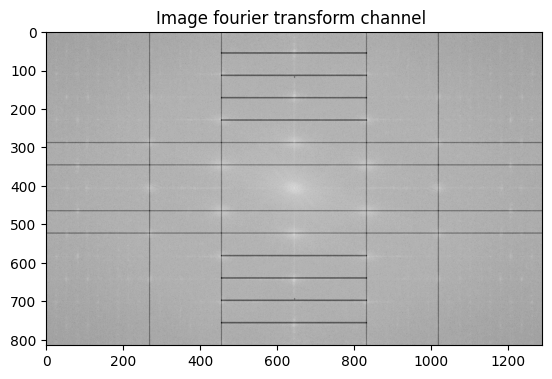

In [5]:
shifted_ft=np.abs(np.fft.fftshift(img1_ft))


pl.figure()
pl.title(f"Image fourier transform channel ")
pl.imshow(np.log10(shifted_ft[:,:]),cmap='gray')
pl.show()

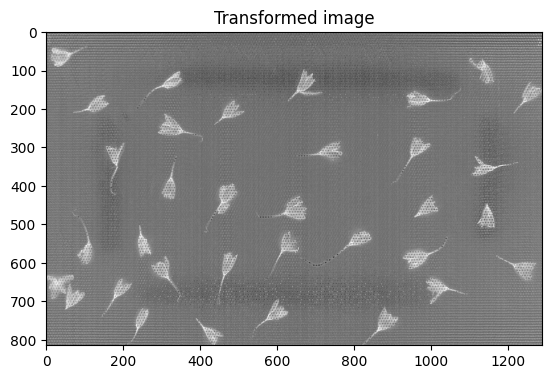

In [7]:
converted_img=np.abs(np.fft.ifftn(img1_ft))
# print(converted_img)

pl.figure()
pl.title(f"Transformed image")
pl.imshow(converted_img/255,cmap='gray_r')
pl.show()

converted_img = converted_img.astype(np.uint8)


## part b
### canny edge detection


(Text(0.5, 1.0, 'Enhanced image Edges'), ([], []), ([], []))

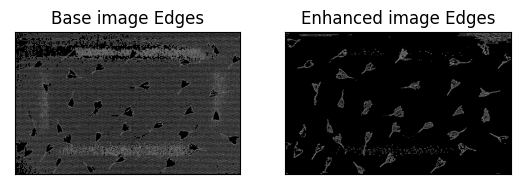

In [27]:
base_edges=cv2.Canny((img1),160,450)

conv_edge = cv2.Canny(converted_img,160,450)

pl.subplot(1,2,1),pl.imshow(base_edges,cmap= 'gray')
pl.title(f"Base image Edges"), pl.xticks([]), pl.yticks([])
pl.subplot(1,2,2),pl.imshow(conv_edge,cmap = 'gray')
pl.title(f"Enhanced image Edges"), pl.xticks([]), pl.yticks([])


## Part 3
### Gradient calculation

(Text(0.5, 1.0, 'Sobel Y'), ([], []), ([], []))

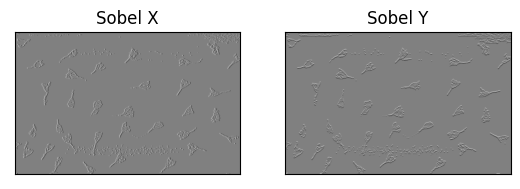

In [28]:
# apply sobel filter on image to find the gradients in each
sobelx = cv2.Sobel(conv_edge,cv2.CV_64F,1,0,ksize=7)
sobely = cv2.Sobel(conv_edge,cv2.CV_64F,0,1,ksize=7)

pl.subplot(1,2,1),pl.imshow(sobelx,cmap = 'gray')
pl.title('Sobel X'), pl.xticks([]), pl.yticks([])
pl.subplot(1,2,2),pl.imshow(sobely,cmap = 'gray')
pl.title('Sobel Y'), pl.xticks([]), pl.yticks([])

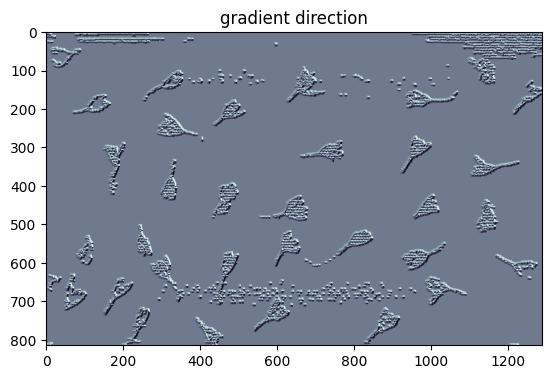

In [29]:
# applying arctan2 on gradient to get the orientation of gradient
direction=np.arctan2(sobely,sobelx)

pl.figure()
pl.title(f"gradient direction")
pl.imshow(direction,cmap='bone')
pl.show()

